## Logistic Regression

- Used for **classification**
- Calculates the **probability that an observation belongs to a binary class**
> if p >= 0.5 -> 1 else 0

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/telecom_churn_clean.csv')

In [3]:
df.head(2)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [4]:
features = ['account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls']
target = 'churn'

df_features = df[features]
df_target = df[target]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
feature_train, feature_test, target_train, target_test = train_test_split(df_features, df_target, test_size=0.3, 
                                                                          random_state=1)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(feature_train, target_train)
predicted_probabilities = model.predict_proba(feature_test)
predicted_probabilities = predicted_probabilities[:, 1]

In [9]:
predicted_probabilities[:3] # Show only 3 predictions

array([0.27648583, 0.05169052, 0.12094844])

## ROC

The ROC curve is used to see how well the model does if we vary the threshold

In [10]:
from sklearn.metrics import roc_curve

In [11]:
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, predicted_probabilities)

In [12]:
import matplotlib.pyplot as plt

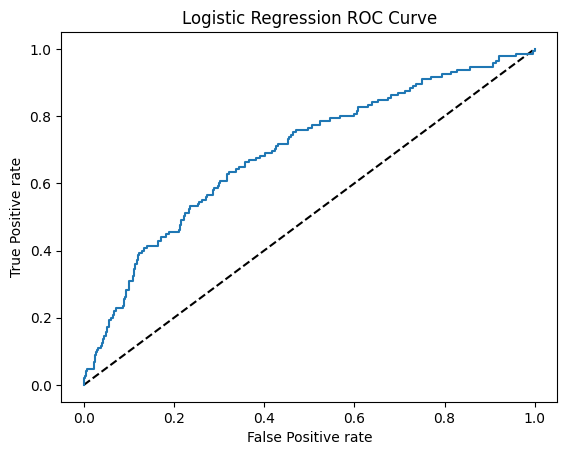

In [13]:
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot([0,1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate)
plt.title('Logistic Regression ROC Curve')
plt.show()
